# Project 3 - Subreddit classification: Horror vs SciFi

## 1 - Scrape, Clean, Preprocess  

### Problem Statement

In the words of Arthur C Clarke (a famous science fiction author), science fiction seldom attempts to predict the future. More often than not, it tries to prevent the future. This implies that science fiction is a sobering warning to us about dystopian or undesirable futures that might happen if we do not take steps now to change it.

Therefore, sometimes science fiction could be accompanied by some elements of horror and might be indistinguishable from the horror genre. 

Being a long time fan of a subreddit called r/nosleep, where redditors write and post horror stories, I attempt to investigate and discover if there are ways to differentiate science fiction from horror.

Specifically, my problem statement is as follows:

**Are there a set of words that define a genre, in this instance. horror vs scifi?**

### Executive Summary

To address the abovementioned problem statement, we did the following:
1) Scraped the r/nosleep (horror) and r/shortscifistories (science fiction) to obtain data for analysis <br>
2) Cleaned data by removing null values and non text posts.<br>
3) Split the data into single word tokens, removed punctuations and digits, and lemmatized the tokens to reduce the tokens to a single form, i.e. 'builds' to 'build'. <br>
4) Fitted and evaluated machine learning classification models to determine which model best distinguishes scifi from horror. <br>
5) Analysed the best model to look at misclassified posts. <br>

### Content

[**1.1 Scrape Reddit** ](#scrape)<br>
[**1.2 Data Cleaning** ](#clean)
*    [1.21 Deduplicate and remove null values ](#dedup)<br><br>
[**1.3 Preprocess Text** ](#preprocess)<br>
[**1.4 Frequency Analysis with Wordcloud and Bar Chart**](#freqanalysis)<br>
[**1.5 Binarize Subreddits and Save Final File for Modelling**](#binarize)<br>

In [1]:
import requests
import time
import random
import string
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

### 1.1 Scrape Reddit <a class="anchor" id="scrape"></a>

In [2]:
url_1 = 'https://www.reddit.com/r/nosleep.json'
url_2 = 'https://www.reddit.com/r/shortscifistories.json'
#url_3 = 'https://www.reddit.com/r/confession.json'
#url_4 = 'https://www.reddit.com/r/rant.json'

In [3]:
#thank you Jefferson
def user_agent_generator(n):
    return ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(n))

In [4]:
#scrape reddit with user agent generator function

def scrape_reddit(url, filename):
    posts = []
    after = None

    for a in range(30):
        if after == None:
            current_url = url
        else:
            current_url = url + '?after=' + after
        print(current_url)
        res = requests.get(current_url, headers={'User-agent': user_agent_generator(6)})

        if res.status_code != 200:
            print('Status error', res.status_code)
            break

        current_dict = res.json()
        current_posts = [p['data'] for p in current_dict['data']['children']]
        posts.extend(current_posts)
        after = current_dict['data']['after']
    
        if a > 0:
                previous = pd.read_csv(filename)
                df = pd.DataFrame(current_posts)
                new_df = pd.concat([previous, df])
                new_df.to_csv(filename, index=False)
        else:
                pd.DataFrame(posts).to_csv(filename, index = False)
                
        # generate a random sleep duration to look more 'natural'
       # sleep_duration = random.randint(2,60)
       # print(sleep_duration)
       # time.sleep(sleep_duration)
    return pd.DataFrame(posts)

In [5]:
posts_1 = scrape_reddit(url_1, 'nosleep.csv')

https://www.reddit.com/r/nosleep.json
https://www.reddit.com/r/nosleep.json?after=t3_m6q6cq
https://www.reddit.com/r/nosleep.json?after=t3_m5bfl6
https://www.reddit.com/r/nosleep.json?after=t3_m4y7j6
https://www.reddit.com/r/nosleep.json?after=t3_m43frn
https://www.reddit.com/r/nosleep.json?after=t3_m3mxje
https://www.reddit.com/r/nosleep.json?after=t3_m2bpvu
https://www.reddit.com/r/nosleep.json?after=t3_m1v304
https://www.reddit.com/r/nosleep.json?after=t3_m1ho5j
https://www.reddit.com/r/nosleep.json?after=t3_m0rfap
https://www.reddit.com/r/nosleep.json?after=t3_m01lm7
https://www.reddit.com/r/nosleep.json?after=t3_lzhwko
https://www.reddit.com/r/nosleep.json?after=t3_lyjqtf
https://www.reddit.com/r/nosleep.json?after=t3_lxmktn
https://www.reddit.com/r/nosleep.json?after=t3_lxwrhr
https://www.reddit.com/r/nosleep.json?after=t3_lwlx1v
https://www.reddit.com/r/nosleep.json?after=t3_lvo425
https://www.reddit.com/r/nosleep.json?after=t3_luv2aq
https://www.reddit.com/r/nosleep.json?after=

In [6]:
posts_2 = scrape_reddit(url_2, 'shortscifistories.csv')

https://www.reddit.com/r/shortscifistories.json
https://www.reddit.com/r/shortscifistories.json?after=t3_lp4936
https://www.reddit.com/r/shortscifistories.json?after=t3_l7e2q6
https://www.reddit.com/r/shortscifistories.json?after=t3_knbawz
https://www.reddit.com/r/shortscifistories.json?after=t3_k4vrwv
https://www.reddit.com/r/shortscifistories.json?after=t3_jlru2g
https://www.reddit.com/r/shortscifistories.json?after=t3_jd4cry
https://www.reddit.com/r/shortscifistories.json?after=t3_j423fv
https://www.reddit.com/r/shortscifistories.json?after=t3_iqr6q6
https://www.reddit.com/r/shortscifistories.json?after=t3_i5p5xx
https://www.reddit.com/r/shortscifistories.json?after=t3_hsxiej
https://www.reddit.com/r/shortscifistories.json?after=t3_hav8sa
https://www.reddit.com/r/shortscifistories.json?after=t3_goomy6
https://www.reddit.com/r/shortscifistories.json?after=t3_g8n9pz
https://www.reddit.com/r/shortscifistories.json?after=t3_fzz94g
https://www.reddit.com/r/shortscifistories.json?after=t3

### 1.2 Data Cleaning <a class="anchor" id="clean"></a>

In [7]:
pd.set_option('display.max_rows', len(posts_1))
pd.set_option('display.max_columns', len(posts_1.columns))

In [8]:
posts_1.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,url_overridden_by_dest,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,link_flair_template_id,author_cakeday
0,None,nosleep,,t2_c446v4f,False,None,0,False,Best Title of 2020 Voting Thread,[],r/nosleep,False,6,None,0,None,False,t3_ls419y,False,dark,0.94,None,public,106,1,{},None,False,[],None,False,False,None,{},None,False,106,None,False,,False,None,[],{},[writing],False,None,1.614279e+09,text,6,None,None,text,redd.it,True,None,None,None,None,https://redd.it/ls3wqc,None,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,True,None,[],False,None,None,moderator,t5_2rm4d,None,None,,ls419y,True,None,TheCusterWolf,None,0,True,all_ads,False,[],False,None,/r/nosleep/comments/ls419y/best_title_of_2020_...,all_ads,True,https://redd.it/ls3wqc,14619003,1.614251e+09,0,None,False,NaN,NaN
1,None,nosleep,,t2_c446v4f,False,None,0,False,February 2021 Voting Thread,[],r/nosleep,False,6,None,0,None,False,t3_m2lno1,False,dark,0.89,None,public,33,0,{},None,False,[],None,False,False,None,{},None,False,33,None,False,,False,None,[],{},[writing],False,None,1.615481e+09,text,6,None,None,text,redd.it,False,None,None,None,None,https://redd.it/m2lfzh,None,False,False,False,False,False,[],[],False,False,False,True,None,[],False,None,None,moderator,t5_2rm4d,None,None,,m2lno1,True,None,TheCusterWolf,None,0,True,all_ads,False,[],False,None,/r/nosleep/comments/m2lno1/february_2021_votin...,all_ads,True,https://redd.it/m2lfzh,14619003,1.615452e+09,0,None,False,NaN,NaN
2,None,nosleep,I absolutely love horror. Growing up I was alw...,t2_wldw2ed,False,None,1,False,"My experience using SLASHER, the social networ...",[],r/nosleep,False,6,flair-series,0,None,False,t3_m68wx0,False,dark,0.95,None,public,1336,14,{},None,False,[],None,False,False,None,{},Series,False,1336,None,True,,False,None,[],"{'gid_1': 2, 'gid_2': 1}",[writing],True,None,1.615930e+09,text,6,None,None,text,self.nosleep,True,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",None,None,None,NaN,None,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,False,None,[],False,None,None,None,t5_2rm4d,None,None,,m68wx0,True,None,Colourblindness,None,28,True,all_ads,False,[],False,None,/r/nosleep/comments/m68wx0/my_experience_using...,all_ads,False,https://www.reddit.com/r/nosleep/comments/m68w...,14619003,1.615901e+09,0,None,False,8beec82a-dcc1-11e8-a09f-0e09eae1a1c0,NaN
3,None,nosleep,I wake up to the annoying drone of a lawnmower...,t2_6eswxkzh,False,None,0,False,I Wake Up to the Annoying Drone of a Lawnmower,[],r/nosleep,False,6,None,0,None,False,t3_m6myyc,False,dark,0.93,None,public,74,0,{},None,False,[],None,False,False,None,{},None

In [9]:
posts_2.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,...,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,crosspost_parent_list,url_overridden_by_dest,crosspost_parent
0,None,shortscifistories,"Hi all,\n\nRecently we—the mods—have had to re...",t2_dr200,False,None,0,False,Links and Post Length,[],r/shortscifistories,False,None,mod,0,None,False,t3_ervvh9,False,dark,1.00,,public,17,1,{},None,False,[],None,False,False,None,{},[mod],False,17,None,False,,1.57962e+09,mod,[],{},[writing],True,None,1.579648e+09,text,None,None,None,...,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",None,None,None,None,True,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,9c431dd8-2cfe-11e4-b15c-12313b0abcee,False,False,False,Spacing Out,[],False,None,None,moderator,t5_2yswc,None,None,,ervvh9,True,None,almenslv,None,6,True,None,False,[],False,dark,/r/shortscifistories/comments/ervvh9/links_and...,None,True,https://www.reddit.com/r/shortscifistories/com...,6494,1.579619e+09,0,None,False,NaN,NaN,NaN
1,None,shortscifistories,"“Come on, Hannah, we can do this. Climb, climb...",t2_56x5vzsy,False,None,0,False,The Winds,[],r/shortscifistories,False,None,micro,0,None,False,t3_m6c2wv,False,dark,0.92,None,public,10,0,{},None,False,[],None,False,False,None,{},[micro],False,10,None,False,,False,None,[],{},[writing],True,None,1.615939e+09,text,None,None,None,...,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",None,None,None,None,False,False,False,False,False,[],[],False,478c9562-25ce-11e4-aaaf-12313b0e480f,False,False,False,None,[],False,None,None,None,t5_2yswc,None,None,,m6c2wv,True,None,BobiOSGamer,None,2,True,None,False,[],False,None,/r/shortscifistories/comments/m6c2wv/the_winds/,None,False,https://www.reddit.com/r/shortscifistories/com...,6494,1.615910e+09,0,None,False,NaN,NaN,NaN
2,None,shortscifistories,The aliens began monitoring Earth when they re...,t2_tsbq3,False,None,0,False,Hungry Hungry Humans,[],r/shortscifistories,False,None,micro,0,None,False,t3_m5t97o,False,dark,0.94,None,public,13,0,{},None,False,[],None,False,False,None,{},Micro,False,13,None,False,,1.61587e+09,None,[],{},[writing],True,None,1.615867e+09,text,None,None,None,...,False,"&lt;!-- SC_OFF --&gt;&lt;div class=""md""&gt;&lt...",None,None,None,None,False,False,False,False,False,[],[],False,NaN,False,False,False,None,[],False,None,None,None,t5_2yswc,None,None,,m5t97o,True,None,Becauseisaidsotoo,None,3,True,None,False,[],False,None,/r/shortscifistories/comments/m5t97o/hungry_hu...,None,False,https://www.reddit.com/r/shortscifistories/com...,6494,1.615838e+09,0,None,False,NaN,NaN,NaN
3,None,shortscifistories,Danny received a first-generation breakthrough...,t2_56x5vzsy,False,None,0,False,Earth’s 7th Mass Extinction,

#### 1.21 Deduplicate and remove null values <a class="anchor" id="dedup"></a>

In [10]:
#checking for duplicates
posts_1.duplicated(subset=['selftext','title']).sum()

27

In [11]:
posts_2.duplicated(subset=['selftext','title']).sum()

0

In [12]:
posts_1.drop_duplicates(subset=['selftext','title'], inplace=True)
posts_2.drop_duplicates(subset=['selftext','title'], inplace=True)

In [13]:
#checking for null values
posts_1[['title', 'selftext']].isnull().sum()

title       0
selftext    0
dtype: int64

In [14]:
posts_2[['title', 'selftext']].isnull().sum()

title       0
selftext    0
dtype: int64

In [15]:
#checking for non text posts
posts_1[posts_1['selftext']=='']

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,author_flair_type,domain,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,url_overridden_by_dest,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,link_flair_template_id,author_cakeday
0,None,nosleep,,t2_c446v4f,False,None,0,False,Best Title of 2020 Voting Thread,[],r/nosleep,False,6,None,0,None,False,t3_ls419y,False,dark,0.94,None,public,106,1,{},None,False,[],None,False,False,None,{},None,False,106,None,False,,False,None,[],{},[writing],False,None,1.614279e+09,text,6,None,None,text,redd.it,True,None,None,None,None,https://redd.it/ls3wqc,None,False,False,False,False,False,"[{'giver_coin_reward': None, 'subreddit_id': N...",[],False,False,False,True,None,[],False,None,None,moderator,t5_2rm4d,None,None,,ls419y,True,None,TheCusterWolf,None,0,True,all_ads,False,[],False,None,/r/nosleep/comments/ls419y/best_title_of_2020_...,all_ads,True,https://redd.it/ls3wqc,14619003,1.614251e+09,0,None,False,NaN,NaN
1,None,nosleep,,t2_c446v4f,False,None,0,False,February 2021 Voting Thread,[],r/nosleep,False,6,None,0,None,False,t3_m2lno1,False,dark,0.89,None,public,33,0,{},None,False,[],None,False,False,None,{},None,False,33,None,False,,False,None,[],{},[writing],False,None,1.615481e+09,text,6,None,None,text,redd.it,False,None,None,None,None,https://redd.it/m2lfzh,None,False,False,False,False,False,[],[],False,False,False,True,None,[],False,None,None,moderator,t5_2rm4d,None,None,,m2lno1,True,None,TheCusterWolf,None,0,True,all_ads,False,[],False,None,/r/nosleep/comments/m2lno1/february_2021_votin...,all_ads,True,https://redd.it/m2lfzh,14619003,1.615452e+09,0,None,False,NaN,NaN
397,None,nosleep,,t2_c446v4f,False,None,0,False,February 2021 contest nominations,[],r/nosleep,False,6,None,0,None,False,t3_lvyh0m,False,dark,0.90,None,public,38,0,{},None,False,[],None,False,False,None,{},None,False,38,None,False,,False,None,[],{},[writing],False,None,1.614708e+09,text,6,None,None,text,redd.it,True,None,None,None,None,https://redd.it/lvyfz7,None,False,False,False,False,False,[],[],False,False,False,True,None,[],False,None,None,moderator,t5_2rm4d,None,None,,lvyh0m,True,None,TheCusterWolf,None,0,True,all_ads,False,[],False,None,/r/nosleep/comments/lvyh0m/february_2021_conte...,all_ads,False,https://redd.it/lvyfz7,14619003,1.614679e+09,0,None,False,NaN,NaN
506,None,nosleep,,t2_c446v4f,False,None,0,False,January 2021 Winners!,[],r/nosleep,False,6,None,0,None,False,t3_lsopb6,False,dark,0.94,None,public,38,0,{},None,False,[],None,False,False,None,{},None,False,38,None,False,,False,None,[],{},[writing],False,None,1.614339e+09,text,6,None,None,text,redd.it,False,None,None,None,None,https://redd.it/lsongy,None,False,False,False,False,False,[],[],False,False,False,True,None,[],False,None,None,moderator,t5_2rm4d,None,None,,lsopb6,True,None,TheCusterWolf,None,1,True,all_a

In [16]:
posts_2[posts_2['selftext']=='']

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,subreddit_name_prefixed,hidden,pwls,link_flair_css_class,downs,top_awarded_type,hide_score,name,quarantine,link_flair_text_color,upvote_ratio,author_flair_background_color,subreddit_type,ups,total_awards_received,media_embed,author_flair_template_id,is_original_content,user_reports,secure_media,is_reddit_media_domain,is_meta,category,secure_media_embed,link_flair_text,can_mod_post,score,approved_by,author_premium,thumbnail,edited,author_flair_css_class,author_flair_richtext,gildings,content_categories,is_self,mod_note,created,link_flair_type,wls,removed_by_category,banned_by,...,allow_live_comments,selftext_html,likes,suggested_sort,banned_at_utc,view_count,archived,no_follow,is_crosspostable,pinned,over_18,all_awardings,awarders,media_only,link_flair_template_id,can_gild,spoiler,locked,author_flair_text,treatment_tags,visited,removed_by,num_reports,distinguished,subreddit_id,mod_reason_by,removal_reason,link_flair_background_color,id,is_robot_indexable,report_reasons,author,discussion_type,num_comments,send_replies,whitelist_status,contest_mode,mod_reports,author_patreon_flair,author_flair_text_color,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,crosspost_parent_list,url_overridden_by_dest,crosspost_parent
579,None,shortscifistories,,t2_ab3sb,False,None,0,False,I'm Sorry,[],r/shortscifistories,False,None,micro,0,None,False,t3_b38bjz,False,dark,0.9,None,public,8,0,{},None,False,[],None,False,False,None,{},[micro],False,8,None,False,,False,None,[],{},[writing],False,None,1.553090e+09,text,None,None,None,...,False,None,None,None,None,None,True,False,False,False,False,[],[],False,478c9562-25ce-11e4-aaaf-12313b0e480f,False,False,False,None,[],False,None,None,None,t5_2yswc,None,None,,b38bjz,True,None,Rahknathal,None,2,True,None,False,[],False,None,/r/shortscifistories/comments/b38bjz/im_sorry/,None,False,https://www.reddit.com/r/shortscarystories/com...,6494,1.553061e+09,0,None,False,"[{'approved_at_utc': None, 'subreddit': 'short...",https://www.reddit.com/r/shortscarystories/com...,t3_b38a9i
594,None,shortscifistories,,t2_1c7ulmym,False,None,0,False,Feeling Human,[],r/shortscifistories,False,None,mini,0,None,False,t3_angjrq,False,dark,1.0,None,public,2,0,{},None,False,[],None,False,False,None,{},[mini],False,2,None,False,,False,None,[],{},[writing],False,None,1.549417e+09,text,None,None,None,...,False,None,None,None,None,None,True,True,False,False,False,[],[],False,4e7dc472-25ce-11e4-99fe-12313d09613a,False,False,False,None,[],False,None,None,None,t5_2yswc,None,None,,angjrq,True,None,calico_crayon_,None,1,True,None,False,[],False,None,/r/shortscifistories/comments/angjrq/feeling_h...,None,False,https://www.reddit.com/r/HFY/comments/an8iwt/f...,6494,1.549389e+09,0,None,False,"[{'approved_at_utc': None, 'subreddit': 'HFY',...",https://www.reddit.com/r/HFY/comments/an8iwt/f...,t3_an8iwt
746,None,shortscifistories,,t2_fza9q46,False,None,0,False,First,[],r/shortscifistories,False,None,micro,0,None,False,t3_85eq9z,False,dark,1.0,None,public,11,0,{},None,False,[],None,False,False,None,{},[micro],False,11,None,False,,False,None,[],{},[writing],False,None,1.521441e+09,text,None,None,None,...,True,None,None,None,None,None,True,False,False,False,False,[],[],False,478c9562-25ce-11e4-aaaf-12313b0e480f,False,False,False,None,[],False,None,None,None,t5_2yswc,None,None,,85eq9z,True,None,flirtingandflossing,None,6,True,None,False,[],False,None,/r/shortscifistories/comments/85eq9z/first/,None,False,https://www.reddit.com/r/shortscarystories/com...,6494,1.521412e+09,0,None,False,"[{'approved_at_utc': None, 'subreddit': 'short...",https://www.reddit.com/r/shortscarystories/com...,t3_85eepb


In [17]:
#removing non text posts
posts_1 = posts_1.drop([0, 1, 397, 506])

In [18]:
posts_1.shape

(719, 105)

In [19]:
# also dropping first post for this subreddit as it is a moderator's pinned post
posts_2 = posts_2.drop([0, 579, 594, 746])

In [20]:
posts_2.shape

(747, 106)

### 1.3 Preprocess text <a class="anchor" id="preprocess"></a>

We will add words related to the subreddit titles to the stopwords list. Next, we will create a text preprocessing function to remove punctuation, digits and lemmatize the text. We are using a lemmatizer instead of a stemmer as we still want to retain the meaning of the words for analysis.

In [22]:
#adding the subreddit names to stopwords
stopword_list = stopwords.words('english')
stopword_list.extend(['nosleep', 'shortscifistories', 'scifi', 'sci', 'fi', 'sci fi', 'sci-fi'])

In [27]:
#text preprocessing function
def text_preprocessor(text):
    text_1 = re.sub("[^\w\s]", " ", text) #remove punctuation
    text_2 = re.sub("[\w]*\d+", " ", text_1) #remove digits
    text_3 = re.sub("[\_]", " ", text_2) #remove underscore 
    text_only = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '',
                       text_3, flags=re.MULTILINE) #remove html
    text = text_only.lower().split() #lowercase and tokenize
    stop = set(stopword_list)
    words = [w for w in text if w not in stop]
    lemmatizer=WordNetLemmatizer()
    final_word = [lemmatizer.lemmatize(w) for w in words]
    return(" ".join(final_word))

In [28]:
#combine title and selftext
prep_text_1 = posts_1['title'] + ' ' + posts_1['selftext']
prep_text_2 = posts_2['title'] + ' ' + posts_2['selftext']

In [29]:
final_text_1 = [text_preprocessor(text) for text in prep_text_1 ]

In [30]:
final_text_2 = [text_preprocessor(text) for text in prep_text_2]

In [31]:
final_text_1[:1]

['experience using slasher social network horror absolutely love horror growing always odd kid wanting watch another cheesy b movie exciting get rush adrenaline pumping blood matter many time watched would still jump monster popped something unexpected happened got little obsessed teen dressing iconic movie monster halloween getting involved extreme haunted house friend long gone realized really weird shit blood gore bother fiction got older though really missed social element childhood felt connecting people interest way honest one day browsing reddit like normally right bed saw advertisement social network called slasher bold blood red color name mixed spooky wood typical horror feel told exactly place fan horror feel part community joined immediately creating profile trying find local people area also app unsurprisingly though many around next checked recommendation really know sure app chose people probably complex algorithm seemed enjoy b movie dean koontz novel course walking dea

In [32]:
final_text_2[:1]

['wind come hannah climb climb climb alfred scared wind come u alfred opened hatch revealing desert landscape grabbed hannah hand stood surface twister came swept away gone sir called wind yes sir nanites generate wind cleansing planet protect nature traveled kilometer see world paradise yes sir ravage century ago fortunately ancestor created nanites blow billion underground']

It looks like we have managed to lemmatise the words and remove all the punctuations and digits. We will proceed to use wordcloud and bar charts to perform a frequency analysis of the words.

### 1.4 Frequency analysis with wordcloud and barchart <a class="anchor" id="freqanalysis"></a>

In [33]:
#wordcloud function
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

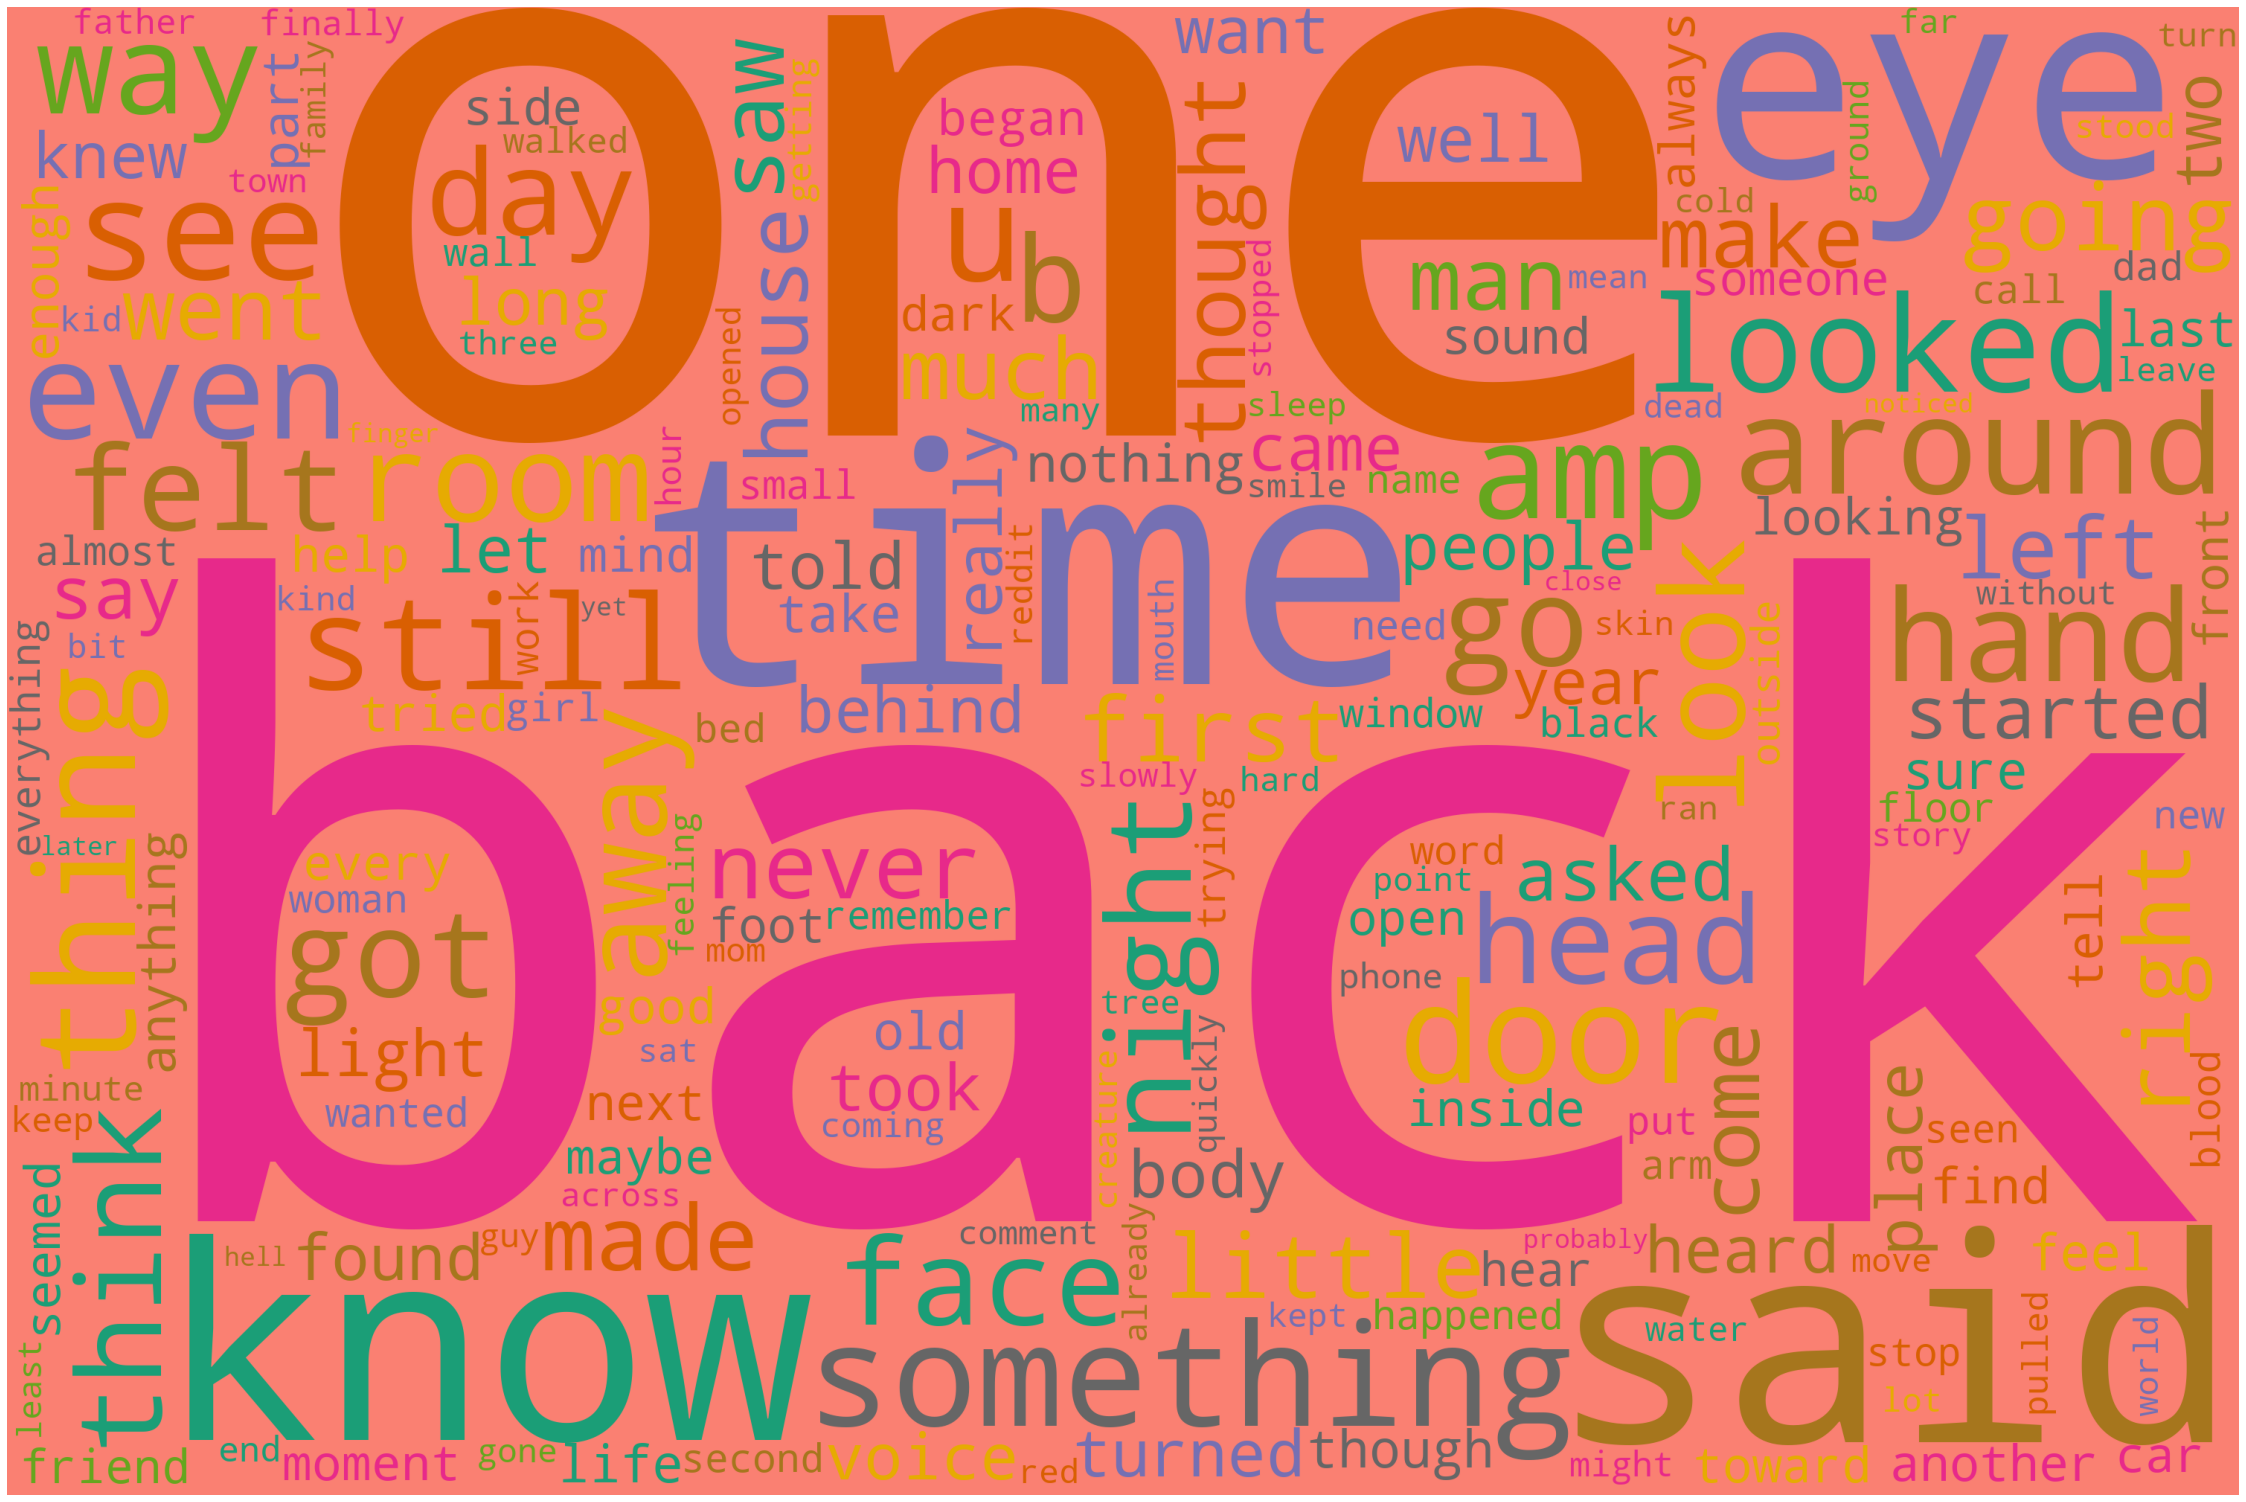

In [34]:
#wordcloud for nosleep
text = " ".join(final_text_1)
wordcloud = WordCloud(background_color='salmon', colormap='Dark2', width=3000, height=2000, collocations=False).generate(text)
plot_cloud(wordcloud)

In [35]:
ns_freq_df = pd.DataFrame({'count': text.split()}) 
ns_freq_df.value_counts().head(20)

count    
like         6679
back         5547
one          5263
could        4742
time         4313
said         4204
would        3959
know         3756
eye          3622
get          3306
something    3229
see          3152
door         3078
thing        3035
around       2960
even         2951
u            2870
looked       2776
amp          2770
still        2687
dtype: int64

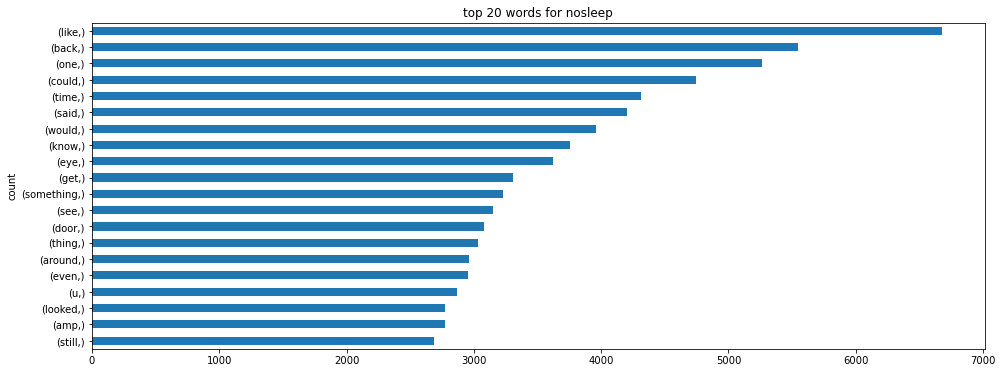

In [36]:
ns_freq_df.value_counts().head(20).plot(kind='barh', figsize=(16,6))
plt.gca().invert_yaxis()
plt.title('top 20 words for nosleep');

As seen from the wordcloud and bar chart, horror stories seem to come with an element of surprise as the word 'back' seems to be one of the most frequently recurring words. Secondly, terms related to sight like 'eye', 'looked' and 'see' also featured in the top 20 most recurring words, which is not surprising as horror stories/movies tend to play on senses like sight.

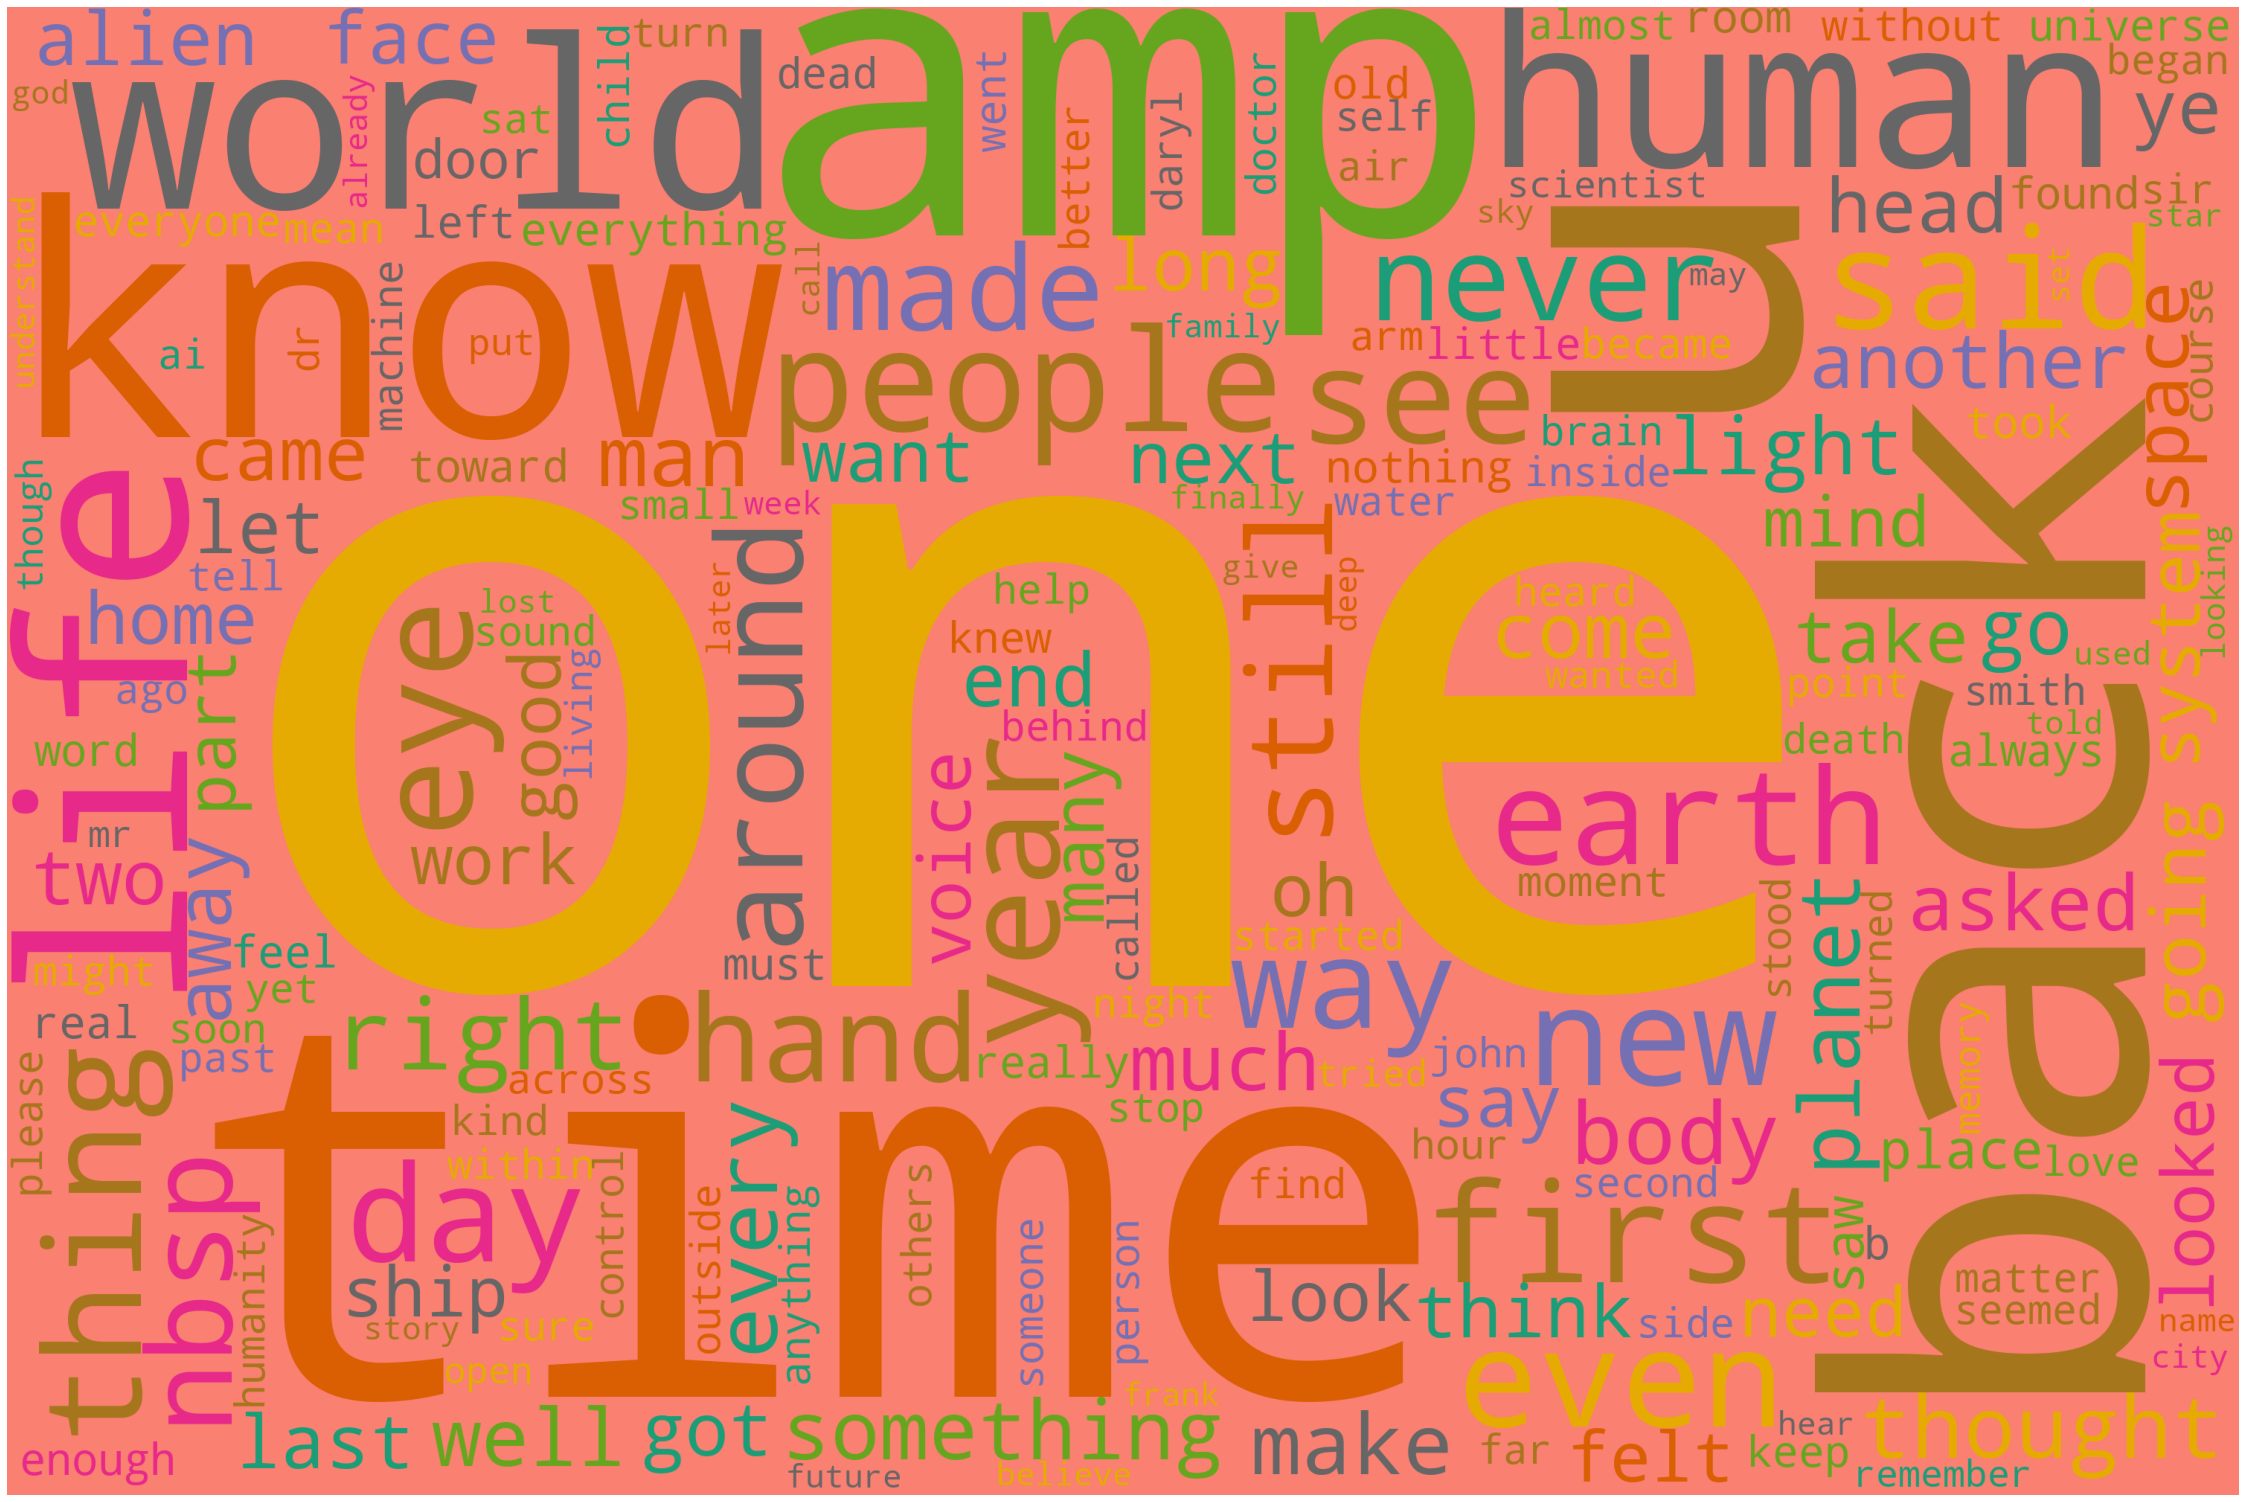

In [37]:
#wordcloud for shortscifistories
text_2 = " ".join(final_text_2)
wordcloud = WordCloud(background_color='salmon', colormap='Dark2', width=3000, height=2000, collocations=False).generate(text_2)
plot_cloud(wordcloud)

In [39]:
scifi_freq_df = pd.DataFrame({'count': text_2.split()}) 
scifi_freq_df.value_counts().head(20)

count 
one       1224
like       956
time       937
would      779
could      698
u          688
back       610
amp        580
know       562
world      539
life       520
human      519
people     489
said       463
first      456
even       441
day        426
thing      426
year       425
earth      422
dtype: int64

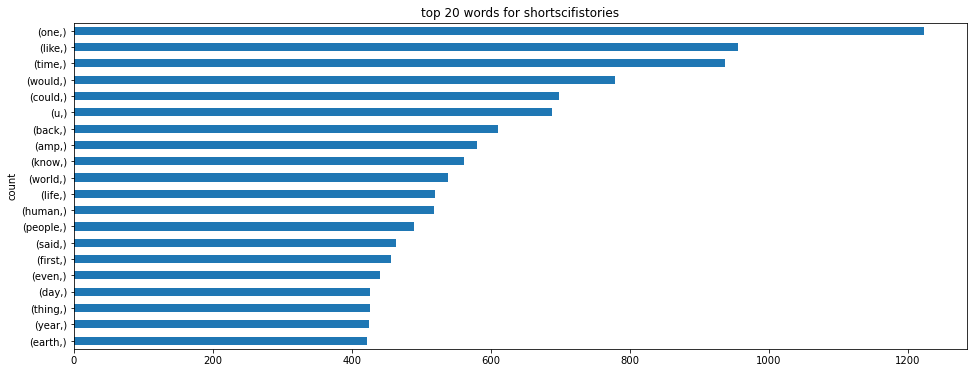

In [40]:
scifi_freq_df.value_counts().head(20).plot(kind='barh', figsize=(16,6))
plt.gca().invert_yaxis()
plt.title('top 20 words for shortscifistories');

We see that stories in the scifi genre share commonly recurring words as well, such as 'time', 'one', 'eye', 'could', 'would' etc. However, there are some differences. Words like 'world', 'life', 'human', 'people' are frequently recurring in scifi. This is in line with the fact that most scifi movies tend to explore themes related to other worldly life forms such as extraterrestial life and the idea of parallel worlds. 

### 1.5 DataFrame preprocessed text, binarize subreddits and save final file for modelling <a class="anchor" id="binarize"></a>

Now that we have cleaned the subreddit data and preprocessed the texts, we will proceed to combine them into a single dataframe. Next, we will append the subreddit columns and use a lambda function to binarize the subreddit names.

In [41]:
# dataframe preprocessed text
df1 = pd.DataFrame(final_text_1, columns=['posts'])
df2 = pd.DataFrame(final_text_2, columns=['posts'])

In [42]:
#appending subreddit column to post
df1['subreddit'] = posts_1['subreddit']

In [43]:
df1.head()

,posts,subreddit
0,experience using slasher social network horror...,NaN
1,wake annoying drone lawnmower wake annoying dr...,NaN
2,today found adult afraid dentist know almost a...,nosleep
3,jacob door story real story happened older bro...,nosleep
4,policeman last call lit neon light hummed purp...,nosleep


In [44]:
#populating NaN values
df1 = df1.fillna('nosleep')

In [45]:
df1.isnull().sum()

posts        0
subreddit    0
dtype: int64

In [46]:
df2['subreddit'] = posts_2['subreddit']

In [47]:
df2.head()

,posts,subreddit
0,wind come hannah climb climb climb alfred scar...,NaN
1,hungry hungry human alien began monitoring ear...,shortscifistories
2,earth th mass extinction danny received first ...,shortscifistories
3,hung rope daryl experienced electrical enginee...,shortscifistories
4,pet rock mar rover surveyed planet topography ...,shortscifistories


In [48]:
df2 = df2.fillna('shortscifistories')

In [49]:
df2.isnull().sum()

posts        0
subreddit    0
dtype: int64

In [50]:
df1.shape

(719, 2)

In [51]:
df2.shape

(747, 2)

In [52]:
#concatenating dataframes together
final_df = pd.concat([df1, df2]).reset_index(drop=True)

In [53]:
final_df.shape

(1466, 2)

In [54]:
final_df.head()

,posts,subreddit
0,experience using slasher social network horror...,nosleep
1,wake annoying drone lawnmower wake annoying dr...,nosleep
2,today found adult afraid dentist know almost a...,nosleep
3,jacob door story real story happened older bro...,nosleep
4,policeman last call lit neon light hummed purp...,nosleep


In [55]:
final_df.tail()

,posts,subreddit
1461,new breed rising dead could feel true hatred l...,shortscifistories
1462,find key pt please read time tea http www redd...,shortscifistories
1463,bury soul die want u bury soul option asked mr...,shortscifistories
1464,complaint writing regard genetically engineere...,shortscifistories
1465,always gray global blindness plague befell ear...,shortscifistories


In [56]:
#binarizing subreddit, target column will be our y
final_df['target'] = final_df['subreddit'].map(lambda x: 1 if x=='nosleep' else 0)

In [57]:
final_df.to_csv('reddit_combined.csv', index=False) # we will use this file for modelling

We now have the csv file we will use for our modelling/classification. We will use a new workbook to do this.